# Modeling Exercise: Logistic Regression
## Corey Solitaire
### 9.15.2020

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data
from prepare import prep_titanic_data_alpha

# In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

# For all of the models you create, choose a threshold that optimizes for accuracy.

In [ ]:
# Cleaned Data for Exploration
df = prep_titanic_data(get_titanic_data())

In [ ]:
df

#### Estabolishing a Baseline

In [ ]:
df.survived.value_counts() 

In [ ]:
baseline_accuracy = (1 - df.survived.mean())
baseline_accuracy

In [ ]:
# Just going to delete the missing values for now
df.dropna(inplace=True)

In [ ]:
df.head()

In [ ]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
#Baseline for our model
survival_rate = (1- y_train.survived.mean())
survival_rate

### Initial Model: (#1)

In [ ]:
## Create a logistic regression object

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [ ]:
# Fit model to traning data
logit.fit(X_train, y_train)

In [ ]:
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
# make a prediction with traning data
y_pred = logit.predict(X_train)

In [ ]:
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)

In [ ]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# Compute percision and support

print(classification_report(y_train, y_pred))

### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [ ]:
df1 = prep_titanic_data(get_titanic_data(cached=True))
df1.head()

In [ ]:
X = df1[['pclass','age','fare']]
y = df1[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [ ]:
logit1 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit1.fit(X_train, y_train)

In [ ]:
# Print coefficents and intercepts
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

In [ ]:
# make a prediction with traning data
y_pred = logit1.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit1.predict_proba(X_train)

In [ ]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# Compute percision and support
print(classification_report(y_train, y_pred))

### 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [ ]:
df2 = prep_titanic_data(get_titanic_data())

In [ ]:
X = df2[['pclass','age','fare','sex_cat']]
y = df2[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [ ]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit2.fit(X_train, y_train)
# Print coefficents and intercepts
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

In [ ]:
# make a prediction with traning data
y_pred = logit2.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit2.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# Compute percision and support
print(classification_report(y_train, y_pred))

### 3. Try out other combinations of features and models.

In [ ]:
df3 = prep_titanic_data(get_titanic_data())
df3.head()

In [ ]:
X = df3[['pclass','alone','embark_town','sex_cat','age']]
y = df3[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [ ]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [ ]:
logit3 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit3.fit(X_train, y_train)
# make a prediction with traning data
y_pred = logit3.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit3.predict_proba(X_train)

In [ ]:
# Print coefficents and intercepts
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

In [ ]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# Compute percision and support
print(classification_report(y_train, y_pred))

### Model 4: Imputer Variable Changed

In [ ]:
df4 = prep_titanic_data(get_titanic_data())
df4.head()

In [ ]:
X = df4[['pclass','alone','embark_town','sex_cat','age']]
y = df4[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

In [ ]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

In [ ]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [ ]:
X_train

In [ ]:
logit4 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit4.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit4.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit4.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit4.score(X_train, y_train)))

In [ ]:
# Compute percision and support
print(classification_report(y_train, y_pred))

### Test (Model)

In [ ]:
df5 = prep_titanic_data(get_titanic_data())

X = df5[['pclass','alone','embark_town','sex_cat','age']]
y = df5[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [ ]:
logit5 = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
logit5.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit5.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit5.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit5.score(X_train, y_train)))

In [ ]:
# Compute percision and support
print(classification_report(y_train, y_pred))

### Test Results for Simple Imputer : baseline = 0.68

- Most_frequent : .68

- Mean : 0.68

- Median: 0.68

Changes made no difference

### Test Results for Change in Variable ('pclass','alone','embark_town','sex_cat','age') baseline =0.74

- add sibsp 0.74

- add parch 0.73

- add fare 0.68

### Test Results for Change in Function Peameters

- C = 1 = 0.76
  - (c=100 : 0.76 ), (c=0.001: 0.41)

- class_weight = 0.74
  - ( removed: 0.76 )

- random_state (Constant)

- Solver
  - ('newton-cg':0.79 ) 
  - ('lbfgs': 0.79)
  - ('liblinear': 0.78) 
  - ('sag': 0.78)
  - ('saga': 0.76)

### Test Results(penalty) baseline = 0.79
Newton
- None :0.79
- l1 : NA
- l2: 0.79
- elasticnet: NA

lbfgs
- none: 0.79
- l1: NA
- l2:0.79
- elasticnet: NA









### 4. Choose you best model and evaluate it on the test dataset. Is it overfit?

- I found that the top models were returned when I used five independent variables along with the newton and lb linear solver.  I pland on using these two solvers for my final model

In [ ]:
#Test Model (newton-cg) #6
df6 = prep_titanic_data(get_titanic_data())

X = df6[['pclass','alone','embark_town','sex_cat','age']]
y = df6[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [ ]:
logit6 = LogisticRegression(C=1, random_state = 123, solver='newton-cg')
logit6.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit6.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit6.predict_proba(X_train)

In [ ]:
#Test Model (liblinear) #7
df7 = prep_titanic_data(get_titanic_data())

X = df7[['pclass','alone','embark_town','sex_cat','age']]
y = df7[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = pd.DataFrame(imp_mean.transform(X_validate))

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = pd.DataFrame(imp_mean.transform(X_test))

In [ ]:
logit7 = LogisticRegression(C=1, random_state = 123, solver='liblinear')
logit7.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit7.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit7.predict_proba(X_train)

#### Evaluate Models #6 and #7 on Validate Sample

In [ ]:
y_pred6 = logit6.predict(X_validate)
y_pred7 = logit7.predict(X_validate)

In [ ]:
print("model 6\n", logit6.score(X_validate, y_validate))
print("model 7\n", logit7.score(X_validate, y_validate))

In [ ]:
print("model 6\n", confusion_matrix(y_validate, y_pred6))

print("model 7\n", confusion_matrix(y_validate, y_pred7))

In [ ]:
print("model 6\n", classification_report(y_validate, y_pred6))

print("model 7\n", classification_report(y_validate, y_pred7))

#### Evaluate our best model on Test

In [ ]:
y_pred = logit6.predict(X_test)
y_pred_proba = logit6.predict_proba(X_test)

accuracy = logit6.score(X_test, y_test)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])
plt.scatter(y_pred_proba, y_test, c=y_pred)

#### Was your data overfit?

Training Accuracy = 0.79
validate Accuracy = 0.80
Test     Accuracy = 0.83

- Model works well on unseen data, suggest that it is NOT overfit

### 5. Bonus How do different strategies for handling the missing values in the age column affect model performance?

- When i deleted all of the missing values my model accuracy went way down.  When i imputed the values with mean, median, most_frequent, the accuracy of my model was not effected.


### 6. Bonus: How do different strategies for encoding sex affect model performance?

- I only using a binary encoding when using sex in my model.  Without using sex a data input in to my model its accuracy went down, so I know sex is important in how the model works. 

### 7. Bonus: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

### Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

### C=.01,.1,1,10,100,1000

- Low c values kill my models accuracy , high c values do no affect it 

### Bonus Bonus: how does scaling the data interact with your choice of C?

- We are not allowed to scale the data so I do not know

# Model without adding back in Null Values

In [ ]:
df8 = prep_titanic_data(get_titanic_data())
df8.dropna(inplace=True)

In [ ]:
X = df8[['pclass','alone','embark_town','sex_cat','age']]
y = df8[['survived']]

In [ ]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:

# Scaling Data
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
# scaler = MinMaxScaler()
# X_train[['pclass','alone','embark_town','sex_cat','age']] = scaler.fit_transform(X_train[['pclass','alone','embark_town','sex_cat','age']])
# X_validate[['pclass','alone','embark_town','sex_cat','age']] = scaler.fit_transform(X_validate[['pclass','alone','embark_town','sex_cat','age']])
# X_test[['pclass','alone','embark_town','sex_cat','age']] = scaler.transform(X_test[['pclass','alone','embark_town','sex_cat','age']])

In [ ]:
#Imputing Missing Data
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_train)
# X_train = imp_mean.transform(X_train)

# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_validate)
# X_validate = imp_mean.transform(X_validate)

# imp_mean = SimpleImputer( strategy='most_frequent')
# imp_mean.fit(X_test)
# X_test = imp_mean.transform(X_test)

In [ ]:
logit8 = LogisticRegression(C=1, random_state = 123, solver='newton-cg')
logit8.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit8.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit8.predict_proba(X_train)

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit8.score(X_train, y_train)))

In [ ]:
y_pred_proba.round()

In [ ]:
y_pred

# Modeling Activity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = y_pred
predicted_y_probs = y_pred_proba

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.61, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = np.array([0]*100 + [1]*100)
predicted_y_probs = np.concatenate((np.random.beta(2,5,100), np.random.beta(8,3,100)))

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.5, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

In [ ]:
test_y = np.array([0]*100 + [1]*100)
test_y

# 2nd attempt

In [ ]:
# acquire (ok, kinda cheating there)
tips = sns.load_dataset('tips')
tips = tips.drop_duplicates()
tips_dummies = pd.get_dummies(tips[['sex', 'day', 'time', 'smoker']], drop_first=True)
tips = pd.concat([tips, tips_dummies], axis=1)
# create target variable: low_tip, defined as tip < 15% of total bill. 
# create target variable: low_tip, defined as tip < 15% of total bill. 
tips['low_tip_target'] = tips.tip/tips.total_bill < .15
cols_to_drop = ['tip', 'sex', 'smoker', 'day', 'time']
tips.drop(columns=cols_to_drop, inplace = True)
train_validate, test = train_test_split(tips, test_size=.2, random_state=123, 
                                        stratify=tips.low_tip_target)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, 
                                   stratify=train_validate.low_tip_target)
logit = LogisticRegression()

X_train = train.drop(columns=['low_tip_target'])
y_train = train.low_tip_target

X_validate = validate.drop(columns=['low_tip_target'])
y_validate = validate.low_tip_target

X_test = test.drop(columns=['low_tip_target'])
y_test = test.low_tip_target

logit = logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred))
# accuracy
logit.score(X_train, y_train)


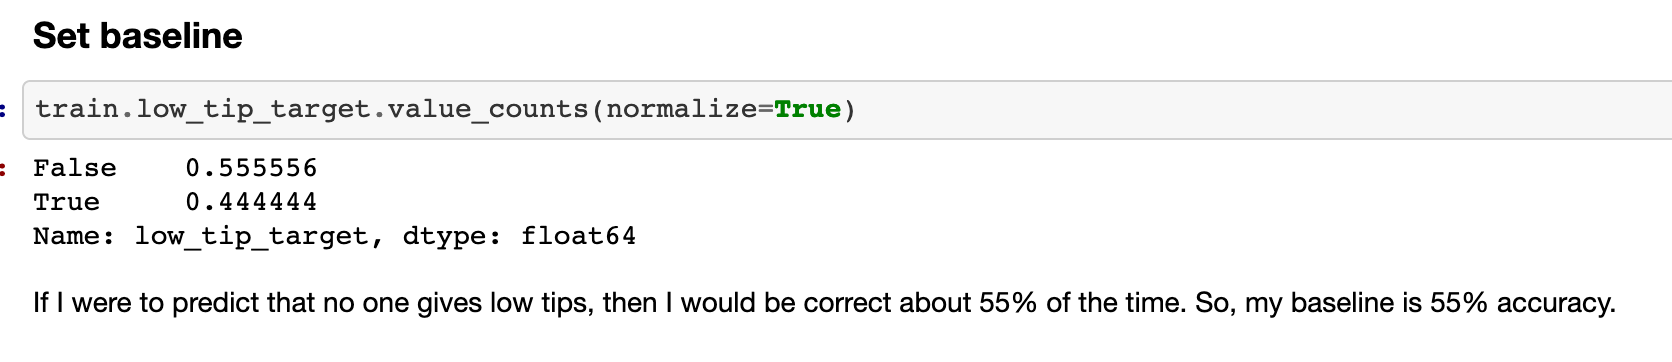

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

test_y = y_pred
predicted_y_probs = y_pred_proba

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.66, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

# Decision Tree Modeling Lesson

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic_data_alpha

In [22]:
#Data that is not scaled, with null values dropped
train, validate, test = prep_titanic_data_alpha(get_titanic_data())

In [3]:
#Baseline Accuracy
baseline_accuracy = (1 - train.survived.mean())
baseline_accuracy

0.5954773869346734

#### Positive Condition = Not Survive

#### Baseline Prediction is Not Survive with 60% Accuracy

In [4]:
train.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sex_cat
450,0,2,36.0,1,2,27.75,2,0,0,1,0,0,1,1
543,1,2,32.0,1,0,26.00,2,0,0,1,0,0,1,1
157,0,3,30.0,0,0,8.05,2,1,0,1,0,0,1,1
462,0,1,47.0,0,0,38.50,2,1,0,1,0,0,1,1
397,0,2,46.0,0,0,26.00,2,1,0,1,0,0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 450 to 749
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 398 non-null    int64  
 1   pclass                   398 non-null    int64  
 2   age                      398 non-null    float64
 3   sibsp                    398 non-null    int64  
 4   parch                    398 non-null    int64  
 5   fare                     398 non-null    float64
 6   embark_town              398 non-null    int8   
 7   alone                    398 non-null    int64  
 8   sex_female               398 non-null    uint8  
 9   sex_male                 398 non-null    uint8  
 10  embark_town_Cherbourg    398 non-null    uint8  
 11  embark_town_Queenstown   398 non-null    uint8  
 12  embark_town_Southampton  398 non-null    uint8  
 13  sex_cat                  398 non-null    int8   
dtypes: float64(2), int64(5),

### 1. Fit the decision tree classifier to your training sample and transform 
### (i.e. make predictions on the training sample)

In [27]:
#Model 1 (Tests all variables)
X_train1 = train.drop(columns=['survived'])
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train1, y_train)
y_pred = clf.predict(X_train1)
y_pred_proba = clf.predict_proba(X_train1)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train1, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 56 105]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.65      0.77       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.86      0.84      0.83       398



In [28]:
#Model 2 (pclass, age, alone, embark_town, sex_cat)
X_train2 = train.drop(columns=['survived', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton'])
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train2, y_train)
y_pred = clf.predict(X_train2)
y_pred_proba = clf.predict_proba(X_train2)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train2, y_train)))
confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 58 103]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.64      0.76       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.85      0.84      0.83       398



In [34]:
#Model 3
X_train3 = train.drop(columns=['survived', 'sibsp', 'parch', 'fare', 'sex_male', 'sex_female' 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton'])
y_train = train.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train3, y_train)
y_pred = clf.predict(X_train3)
y_pred_proba = clf.predict_proba(X_train3)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train3, y_train)))

confusion_matrix(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.84
[[230   7]
 [ 58 103]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.64      0.76       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.85      0.84      0.83       398

